<a href="https://colab.research.google.com/github/AcerPing/AceTibaMe/blob/master/%E4%BA%BA%E8%87%89%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install face_recognition

結衣長這樣: [-0.05455185  0.06901871  0.00963631 -0.08021796 -0.14827204  0.00424579
 -0.10143465 -0.00595202  0.20471749 -0.21735913  0.20260489 -0.11192471
 -0.20830208  0.02574698 -0.09518227  0.25959843 -0.15485558 -0.15347609
 -0.01808424 -0.02623726  0.08684476  0.08228582 -0.08977418  0.04885644
 -0.15379295 -0.3544575  -0.11139868 -0.08948946 -0.08746456 -0.11583692
 -0.0047866   0.06104692 -0.0649958   0.04194889  0.06080432  0.07105009
  0.02072362 -0.11060274  0.14474952  0.10935471 -0.33882123 -0.00039911
  0.1237473   0.29801059  0.1140762   0.01407522 -0.02076775 -0.09401815
  0.15661702 -0.19341509  0.00474528  0.09689201  0.09793967  0.06375112
  0.07857017 -0.14705977  0.04315316  0.11889757 -0.18568216  0.00305318
  0.07673843 -0.0854025  -0.00680517 -0.08908756  0.22676368  0.12683824
 -0.12622723 -0.19784719  0.17061183 -0.14804724 -0.10028525  0.10967845
 -0.14174372 -0.19827405 -0.25876838 -0.04313755  0.39132228  0.14324568
 -0.12119928  0.0499575   0.02130826 -0.0134

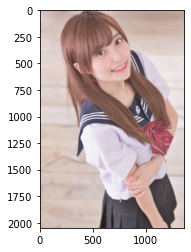

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import face_recognition
img = face_recognition.load_image_file("結衣.jfif")
en = face_recognition.face_encodings(img)[0]
print("結衣長這樣:", en)
plt.imshow(img)

In [3]:
import glob

sub = ["jfif", "jpg", "png", "jpeg"]
fn_list = []
for s in sub:
    fn_list = fn_list + glob.glob("*.{}".format(s))
encodings, names = [], []
for fn in fn_list:
    img = face_recognition.load_image_file(fn)
    en = face_recognition.face_encodings(img)[0]
    encodings.append(en)
    n = fn.split(".")[0]
    names.append(n)
print(names)
print(encodings)

['結衣', 'Yui', 'Jay', 'Eason', 'Chiling']
[array([-0.05455185,  0.06901871,  0.00963631, -0.08021796, -0.14827204,
        0.00424579, -0.10143465, -0.00595202,  0.20471749, -0.21735913,
        0.20260489, -0.11192471, -0.20830208,  0.02574698, -0.09518227,
        0.25959843, -0.15485558, -0.15347609, -0.01808424, -0.02623726,
        0.08684476,  0.08228582, -0.08977418,  0.04885644, -0.15379295,
       -0.3544575 , -0.11139868, -0.08948946, -0.08746456, -0.11583692,
       -0.0047866 ,  0.06104692, -0.0649958 ,  0.04194889,  0.06080432,
        0.07105009,  0.02072362, -0.11060274,  0.14474952,  0.10935471,
       -0.33882123, -0.00039911,  0.1237473 ,  0.29801059,  0.1140762 ,
        0.01407522, -0.02076775, -0.09401815,  0.15661702, -0.19341509,
        0.00474528,  0.09689201,  0.09793967,  0.06375112,  0.07857017,
       -0.14705977,  0.04315316,  0.11889757, -0.18568216,  0.00305318,
        0.07673843, -0.0854025 , -0.00680517, -0.08908756,  0.22676368,
        0.12683824, -0

網址:https://scontent-tpe1-1.xx.fbcdn.net/v/t1.0-9/118401901_191979745744779_1673055124741076828_o.jpg?_nc_cat=103&_nc_sid=8bfeb9&_nc_ohc=77U9E4OnT0IAX_JJo8U&_nc_ht=scontent-tpe1-1.xx&oh=725051cf8f4a89f798377e029ad6e429&oe=5F718EE9


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


跟 結衣 的距離是: 0.5211996726287881
跟 Yui 的距離是: 0.5162046642993496
跟 Jay 的距離是: 0.7974364557719318
跟 Eason 的距離是: 0.8376348117288137
跟 Chiling 的距離是: 0.5453007256156819
這個最像: Yui


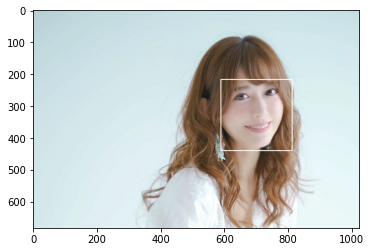

In [12]:
import requests
import cv2
url = input("網址:")
response = requests.get(url, stream=True, verify=False)
img = face_recognition.load_image_file(response.raw)
ens = face_recognition.face_encodings(img)
locs = face_recognition.face_locations(img)
for (top, right, bottom, left), en in zip(locs, ens):
    cv2.rectangle(img, (left, top), (right, bottom), (255, 255, 255), 2)
    distances = face_recognition.face_distance(en, encodings)
    for d, n in zip(distances, names):
        print("跟", n, "的距離是:", d)
    mind = names[distances.argmin()]
    print("這個最像:", mind)
plt.imshow(img)